# Variational quantum kernel density estimation with 2 Dimensional data sets

Data taken from https://zenodo.org/records/7822851



## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

In [2]:
!pip install tensorcircuit

In [3]:
!pip install git+https://github.com/diegour1/qmc.git

  Cloning https://github.com/diegour1/qmc.git to /tmp/pip-req-build-5cgitgrw
  Running command git clone --filter=blob:none --quiet https://github.com/diegour1/qmc.git /tmp/pip-req-build-5cgitgrw
  Resolved https://github.com/diegour1/qmc.git to commit 4c2db4b21508f28466743eaf0b13fe70814f65dc
  Preparing metadata (setup.py) ... done


In [4]:
#!nvidia-smi

# 2 Dimensions

In [5]:
def calculate_constant_qmkde(gamma=1, dimension = 1):
  sigma = (4*gamma)**(-1/2)
  coefficient = 1 /  (2*np.pi*sigma**2)**(dimension/2)
  return coefficient

In [6]:
def calculate_constant_log_qmkde(gamma=1, dimension = 1):
  sigma = (4*gamma)**(-1/2)
  coefficient = np.log(1) - (dimension/2.) *   np.log(2*np.pi*sigma**2)
  return coefficient

In [7]:
def raw_kde(x_test, x_train, gamma=1):
  sigma = (2*gamma)**(-1/2)
  euclidean_distance = np.sum(((x_test-x_train))**2, axis=1)
  exponential  = np.exp(-euclidean_distance/(2*sigma**2))
  constant_outside = 1/(np.size(x_train) * (2*np.pi*sigma**2)**(x_train.shape[1]/2))
  return constant_outside * np.sum(exponential)

In [8]:
def raw_log_kde(x_test, x_train, gamma=1):
  sigma = (2*gamma)**(-1/2)
  euclidean_distance = np.sum(((x_test-x_train))**2, axis=1)
  exponential  = np.exp(-euclidean_distance/(2*sigma**2))
  constant_outside = np.log(1) - np.log(np.size(x_train)) - (x_train.shape[1]/2) * np.log(2*np.pi*sigma**2)
  return constant_outside + np.log(np.sum(exponential))

In [9]:
import matplotlib.pyplot as plt

def plot(X_train, X_train_density, X_test, X_test_density, name = "dataset"):
    plt.axes(frameon = 0)
    plt.grid()
    plt.scatter(X_test[:,0],  X_test[:,1], c = X_test_density , alpha = .5, s = 3, linewidths= 0.0000001)
    plt.colorbar()
    plt.title('arc dataset')
    plt.savefig(f'{name}.png',dpi = 300)
    plt.show()

# 2 Dim Datasets

## Binomial dataset

In [10]:
tfd = tfp.distributions

# Initialize a single 2-variate Gaussian.
mvn = tfd.MultivariateNormalDiag(
    loc=[1., -1],
    scale_diag=[1, 2.])

X = mvn.sample(sample_shape=10000, seed = 1)


In [11]:
from sklearn.metrics.pairwise import euclidean_distances
A = euclidean_distances(X, X)
A[np.triu_indices_from(A, k=1)]

array([7.9033756, 2.0053935, 7.3504186, ..., 1.0203874, 2.5100377,
       1.5725329], dtype=float32)

In [12]:
batch_size = 32

from  sklearn import model_selection
X_train, val_data = model_selection.train_test_split(X.numpy(), test_size=0.3)

train_dataset = tf.data.Dataset.from_tensor_slices(X_train)
batched_train_data = train_dataset.batch(batch_size)

In [13]:
x, y = np.mgrid[-6:6:.1, -6:6:.1]
pos = np.dstack((x, y))
X_plot = pos.reshape([14400,2])

real_prob = mvn.prob(X_plot)

log max probability: tf.Tensor(
[8.00581593e-14 9.06043361e-14 1.02283904e-13 ... 1.77889403e-09
 1.50266632e-09 1.26616140e-09], shape=(14400,), dtype=float32)
log min probability: tf.Tensor(
[8.00581593e-14 9.06043361e-14 1.02283904e-13 ... 1.77889403e-09
 1.50266632e-09 1.26616140e-09], shape=(14400,), dtype=float32)


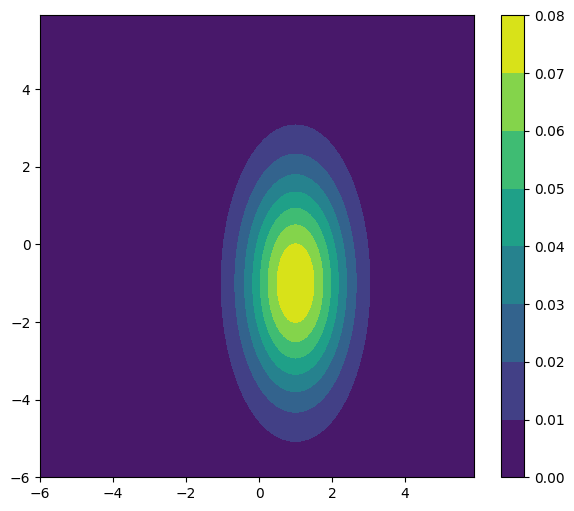

In [14]:
params = {
   'axes.labelsize': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [7.0, 6.0]
   }
plt.rcParams.update(params)

print("log max probability:", real_prob)
print("log min probability:", real_prob)

#fig2 = plt.figure()
#ax2 = fig2.add_subplot(111)
plt.contourf(x, y, real_prob.numpy().reshape([120,120]))
plt.colorbar()
plt.savefig("spiralsdmkde.pdf")

## Potential 1 dataset

In [ ]:
def load_potential_1(train_size, test_size, dimension=2):

    print(f"loading potential_1 trian_size: {train_size} test_size: {test_size} dimension: {dimension}")

    X = np.loadtxt("NF1_1M.csv").astype(np.float32)
    X_densities = np.loadtxt("NF1_1M_densities.csv").astype(np.float32)

    X_train = X[:train_size, :]
    X_train_densities = X_densities[:train_size]
    X_test = X[train_size: train_size + test_size, :]
    X_test_densities = X_densities[train_size: train_size + test_size]

    return X_train, X_train_densities, X_test, X_test_densities



In [ ]:
!gdown --id 1iGX6Ux9agD7Naom0HFAu2sxxaQAKVFVX
!gdown --id 1kW7UPgICZCkjIAWZ-oWDwLCtYl0LMNar

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1iGX6Ux9agD7Naom0HFAu2sxxaQAKVFVX
To: /content/NF1_1M_densities.csv
100% 25.0M/25.0M [00:00<00:00, 64.6MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1kW7UPgICZCkjIAWZ-oWDwLCtYl0LMNar
To: /content/NF1_1M.csv
 14% 7.34M/51.0M [00:00<00:01, 22.3MB/s]Traceback (most recent call last):
  File "/usr/local/bin/gdown", line 8, in <module>
  File "/usr/local/lib/python3.10/dist-packages/gdown/cli.py", line 169, in main
    download(
  File "/usr/local/lib/python3.10/dist-packages/gdown/download.py", line 328

In [ ]:
X_train, X_train_densities, X_test, X_test_densities = load_potential_1(80000,1000,dimension=2)

loading potential_1 trian_size: 80000 test_size: 1000 dimension: 2


FileNotFoundError: NF1_1M.csv not found.

In [ ]:
plot(X_train, X_train_densities, X_test, X_test_densities)

In [ ]:
x, y = np.mgrid[-4:4:(8/120), -4:4:(8/120)]
pos = np.dstack((x, y))
X_plot = pos.reshape([14400,2])

## Potential 2 dataset

In [11]:
!gdown --id 1VSXlzTLtrS5E7QmWwhyRHuSSKE1HvbZX
!gdown --id 18nAP1faHJjpzKskyhenvStI1jM83SIzO

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1VSXlzTLtrS5E7QmWwhyRHuSSKE1HvbZX
To: /content/nf2.npy
100% 880k/880k [00:00<00:00, 98.7MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=18nAP1faHJjpzKskyhenvStI1jM83SIzO
To: /content/NF2_densities.csv
100% 2.75M/2.75M [00:00<00:00, 122MB/s]


In [12]:
def load_potential_2(train_size, test_size, dimension=2):

    print(f"loading potential_2 trian_size: {train_size} test_size: {test_size} dimension: {dimension}")

    X = np.load("nf2.npy").astype(np.float32)
    X_densities = np.loadtxt("NF2_densities.csv").astype(np.float32)

    X_train = X[:train_size, :]
    X_train_densities = X_densities[:train_size]
    X_test = X[train_size: train_size + test_size, :]
    X_test_densities = X_densities[train_size: train_size + test_size]

    return X_train, X_train_densities, X_test, X_test_densities

In [13]:
X_train, X_train_densities, X_test, X_test_densities = load_potential_2(80000,1000,dimension=2)

loading potential_2 trian_size: 80000 test_size: 1000 dimension: 2


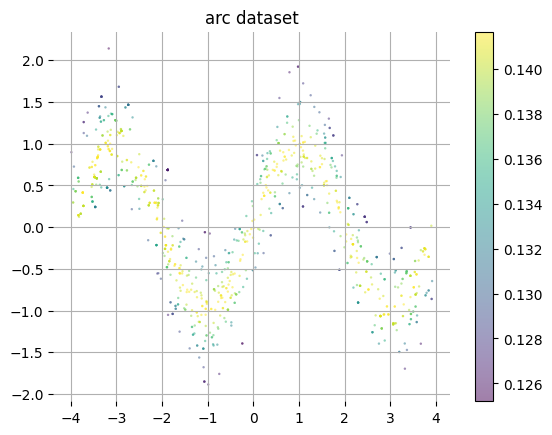

In [14]:
plot(X_train, X_train_densities, X_test, X_test_densities)

In [15]:
x, y = np.mgrid[-4:4:(8/120), -3:3:(6/120)]
pos = np.dstack((x, y))
X_plot = pos.reshape([14400,2])

## ARC dataset

Weird Gaussians from `Masked Autoregressive Flow for Density Estimation`
***

See the article [here](https://arxiv.org/pdf/1705.07057.pdf) where the distribution of the data is given by the following density:

$$
p(x,y) = \mathcal{N}\left(x_2| 0,4\right) \mathcal{N}\left(x_1|\frac{1}{4}x_2^2,1\right)
$$

### Dataset Generation

In [ ]:
dataset_size = 40_000

In [ ]:
x2_dist = tfd.Normal(loc=0., scale=4.)
x2_samples = x2_dist.sample(dataset_size)
x1 = tfd.Normal(loc=.25 * tf.square(x2_samples),
                scale=tf.ones(dataset_size, dtype=tf.float32))
x1_samples = x1.sample()
x_samples = tf.stack([x1_samples, x2_samples], axis=1)

In [ ]:
X_densities = x2_dist.prob(x_samples[:,1]) * x1.prob(x_samples[:,0])

True densities

In [ ]:
x2 = tfp.distributions.Normal(loc = 0., scale = 4.)
x1 = tfp.distributions.Normal(loc = .25 * tf.square(x_samples[:,1]), scale = tf.ones(40_000, dtype=tf.float32))

In [ ]:
X_densities = x2.prob(x_samples[:,1]) * x1.prob(x_samples[:,0])

Scatter plot of the data

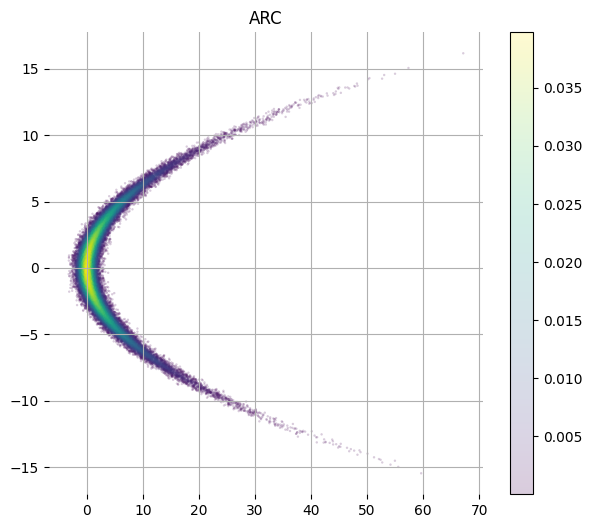

In [ ]:
plt.axes(frameon = 0)
plt.grid()
plt.scatter(x_samples[:,0],  x_samples[:,1], c = X_densities.numpy() , alpha = .2, s = 3, linewidths= 0.0000001)
plt.colorbar()
plt.title('ARC')
plt.savefig('alldensities_arc.png',dpi = 300)
plt.show()

To generate mesh grid data that will be used to calculate probability density plot

In [ ]:
import scipy.stats

In [ ]:
x, y = np.mgrid[-10:40:(50/120), -15:15:(30/120)]
pos = np.dstack((x, y))
X_plot = pos.reshape([14400,2])

real_prob = x2_dist.prob(X_plot[:,1]) * scipy.stats.norm(0.25 * np.square(X_plot[:,1]), 1).pdf(X_plot[:,0])

In [ ]:
plt.rcParams["figure.figsize"] = (20*0.25,15*0.25)

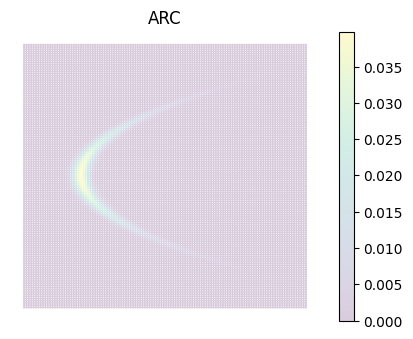

In [ ]:
plt.axes(frameon = 0)
plt.grid()
#plt.scatter(x, y, c = real_prob.numpy().reshape([500,300]) , alpha = .2, s = 3, linewidths= 0.0000001)
plt.scatter(x, y, c = real_prob.numpy().reshape([120,120]) , alpha = .2, s = 3, linewidths= 0.0000001)
plt.colorbar()
plt.title('ARC')
plt.yticks([])
plt.xticks([])
plt.savefig('alldensities_arc.png',dpi = 300)
plt.show()

In [ ]:
x_samples.shape

TensorShape([40000, 2])

In [ ]:
from  sklearn import model_selection
batch_size = 32
X_train, test_set = model_selection.train_test_split(x_samples.numpy(), test_size=0.3)

train_dataset = tf.data.Dataset.from_tensor_slices(X_train)
batched_train_data = train_dataset.batch(batch_size)

## Star eight dataset

In [ ]:
!gdown --id 1yr0NkgYXdiGi2UsDCgjfcRcfHax7wmCz
!gdown --id 103NFYP5uvpht9TUeEF3ObqJa_8HT3xME
!gdown --id 1F879MIVT2EaS33AWM3kPJ3gQwtVcvkap
!gdown --id 1ppUWUUPRxkl4alDqcDllzS2KckMN9g_0

In [ ]:
def load_star_eight(train_size, test_size, dimension=2):
    print(f"loading star_eight trian_size: {train_size} test_size: {test_size} dimension: {dimension}")

    X_train = np.load("star_eight_train.npy").astype(np.float32)[:train_size, :dimension]
    X_train_densities = np.load("star_eight_train_density.npy").astype(np.float32) [:train_size]
    X_test = np.load("star_eight_test.npy").astype(np.float32)[:test_size, :dimension]
    X_test_densities = np.load("star_eight_test_density.npy").astype(np.float32)[:test_size]
    return X_train, X_train_densities, X_test, X_test_densities

In [ ]:
X_train, X_train_densities, X_test, X_test_densities = load_star_eight(80000,1000,dimension=2)

X_train.shape

In [ ]:
plot(X_train, X_train_densities, X_test, X_test_densities)

In [ ]:
x, y = np.mgrid[-7:7:(14/120), -7:7:(14/120)]
pos = np.dstack((x, y))
X_plot = pos.reshape([14400,2])

# Constants




In [16]:
GAMMA_DICT = {"Binomial": 2., "Potential 1": 4., "Potential 2": 16., "Arc": 4., "Star": 16.}
GAMMA = GAMMA_DICT["Potential 2"] ## change GAMMA accordingly
DIM_X = X_train.shape[1]
EPOCHS = 15 ## set 15 for the final experiments
N_RFFS = 32 ## set 64 for the final experiments
RANDOM_STATE = 15
PS_SIZE = 128 ## set 256 for the final experiments

# 2.5 RAW-KDE

In [17]:
def calculate_constant_qmkde(gamma=1, dimension = 1):
  sigma = (4*gamma)**(-1/2)
  coefficient = 1 /  (2*np.pi*sigma**2)**(dimension/2)
  return coefficient

In [18]:
def raw_kde(x_test, x_train, gamma=1):
  sigma = (2*gamma)**(-1/2)
  euclidean_distance = np.sum(((x_test-x_train))**2, axis=1)
  exponential  = np.exp(-euclidean_distance/(2*sigma**2))
  constant_outside = 1/(np.size(x_train) * (2*np.pi*sigma**2)**(x_train.shape[1]/2))
  return constant_outside * np.sum(exponential)

In [19]:
def raw_kde(x_test, x_train, gamma=1):
  sigma = (2*gamma)**(-1/2)
  euclidean_distance = np.sum(((x_test-x_train))**2, axis=1)
  exponential  = np.exp(-euclidean_distance/(2*sigma**2))
  constant_outside = 1/(np.size(x_train) * (2*np.pi*sigma**2)**(x_train.shape[1]/2))
  return constant_outside * np.sum(exponential)

In [20]:
# Given the eigenvalues this function return a Unitary gate which converts the |0> -> |psi_train>
def create_U_train(x_train_param, seed=0):
  np.random.seed(seed)
  size_U = len(x_train_param)
  U_train = np.zeros((size_U, size_U), dtype = np.complex128)
  x_1 = x_train_param
  U_train[:, 0] = x_1
  for i in range(1, size_U):
    x_i =  np.complex128(np.random.randn(size_U) + 1j*np.random.randn(size_U))
    for j in range(0, i):
      x_i -= x_i.dot(np.conjugate(U_train[:, j])) * U_train[:, j]
    x_i = x_i/np.linalg.norm(x_i)
    U_train[:, i] = x_i

  return U_train

In [21]:
raw_kde_probability = np.array([raw_kde(x_temp[np.newaxis,:], X_train, GAMMA) for x_temp in X_plot])
raw_kde_probability_train = np.array([raw_kde(x_temp[np.newaxis,:], X_train, GAMMA) for x_temp in X_train])

GAMMA, raw_kde_probability.shape, raw_kde_probability_train.shape

(16.0, (14400,), (80000,))

max probability: 0.0608053498428422
min probability: 4.174288195853175e-46
log max probability: -2.8000775030447618
log min probability: -104.48997042596991


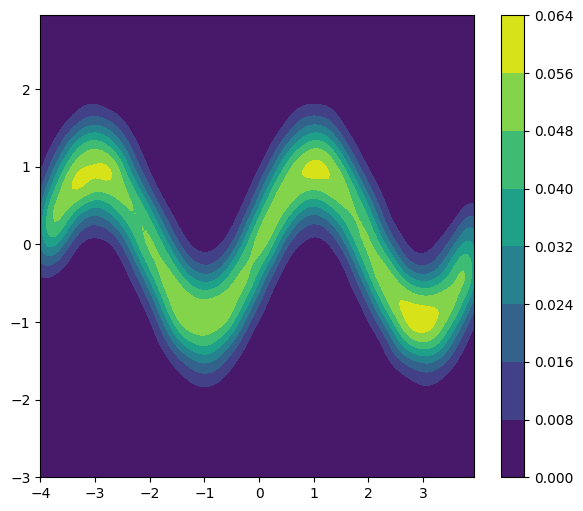

In [22]:
params = {
   'axes.labelsize': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [7.0, 6.0]
   }
plt.rcParams.update(params)

print("max probability:", raw_kde_probability.max())
print("min probability:",raw_kde_probability.min())

print("log max probability:", np.log(raw_kde_probability.max()))
print("log min probability:", np.log(raw_kde_probability.min()))

plt.contourf(x, y, raw_kde_probability.reshape([120,120]))
plt.colorbar()
plt.savefig("spiralsdmkde.pdf")

# DMKDE Classical

In [23]:
import qmc.tf.layers as qmc_layers
import qmc.tf.models as qmc_models

In [24]:
type_ffs = "qrff"
if type_ffs == "rff":
  fm_x = qmc_layers.QFeatureMapRFF(DIM_X, dim=N_RFFS, gamma=GAMMA/2, random_state= RANDOM_STATE)
  qmd = qmc_models.QMDensity(fm_x, N_RFFS)
elif type_ffs == "qrff":
  fm_x = qmc_layers.QFeatureMapComplexRFF(DIM_X, dim=N_RFFS, gamma=GAMMA/2, random_state= RANDOM_STATE)
  qmd = qmc_models.ComplexQMDensity(fm_x, N_RFFS)
qmd.compile()
qmd.fit(X_train, epochs=1)
predictions_classical = tf.cast(qmd.predict(X_plot), tf.float32).numpy()
predictions_classical_train = tf.cast(qmd.predict(X_train), tf.float32).numpy()

450/450 [==============================] - 1s 2ms/step


2500/2500 [==============================] - 4s 1ms/step


max probability: 0.053192105
min probability: 0.025428424
log max probability: -2.9338453
log min probability: -3.6718876


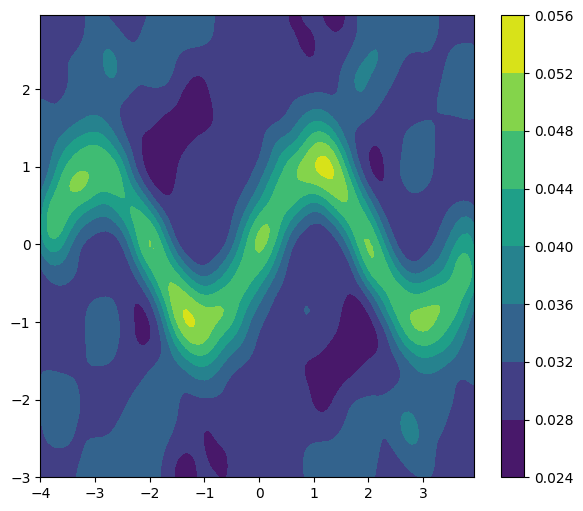

In [25]:
params = {
   'axes.labelsize': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [7.0, 6.0]
   }
plt.rcParams.update(params)

print("max probability:", predictions_classical.max())
print("min probability:", predictions_classical.min())

print("log max probability:", np.log(predictions_classical.max()))
print("log min probability:", np.log(predictions_classical.min()))

plt.contourf(x, y, predictions_classical.reshape([120,120]))
plt.colorbar()
plt.savefig("spiralsdmkde.pdf")

# VQ-KDE Mixed with QRFF


In [26]:
import matplotlib.pyplot as plt

## VQ-KDE mixed with QRFF training

In [28]:
weights_ffs_temp = fm_x.rff_weights.numpy()/np.sqrt(GAMMA) ## originally 2. weights extracted from classical DMKDE

weights_ffs_temp.mean(), weights_ffs_temp.std()

(-0.06322023, 0.9963657)

In [29]:
def predict_features(X_param, var_param, gamma_param):
  X_feat = np.ones((len(X_param), var_param.shape[1]), dtype = np.complex128)
  X_feat[:, :] = np.cos(np.sqrt(gamma_param)*(X_param @ var_param)) - 1j*np.sin(np.sqrt(gamma_param)*(X_param @ var_param))
  X_feat *= np.sqrt(1/(var_param.shape[1]))
  return X_feat

X_feat_train = predict_features(X_train, weights_ffs_temp, GAMMA)
X_feat_test = predict_features(X_plot, weights_ffs_temp, GAMMA)
y_expected =  raw_kde_probability_train

X_feat_train.shape, X_feat_test.shape, y_expected.shape

((80000, 32), (14400, 32), (80000,))

In [30]:
## Convert states to unitaries

U_train_conjTrans = np.array([np.conjugate(create_U_train(X_feat_train[i]).T) for i in range(len(X_feat_train))])
U_test_conjTrans = np.array([np.conjugate(create_U_train(X_feat_test[i]).T) for i in range(len(X_feat_test))])

U_train_conjTrans.shape, U_test_conjTrans.shape

((80000, 32, 32), (14400, 32, 32))

In [ ]:
vc = VQKDE_QRFF(dim_x_param = DIM_X, var_pure_state_size=PS_SIZE, gamma=GAMMA, epochs = EPOCHS)

vc.fit(U_train_conjTrans, y_expected, batch_size=16)

Epoch 1/15
5000/5000 [==============================] - 261s 24ms/step - loss: 65.6232 - kullback_leibler_divergence: 0.5792
Epoch 2/15
5000/5000 [==============================] - 119s 24ms/step - loss: 59.0494 - kullback_leibler_divergence: 0.3060
Epoch 3/15
5000/5000 [==============================] - 120s 24ms/step - loss: 58.4730 - kullback_leibler_divergence: 0.2834
Epoch 4/15
5000/5000 [==============================] - 117s 23ms/step - loss: 58.4510 - kullback_leibler_divergence: 0.2819
Epoch 5/15
5000/5000 [==============================] - 128s 26ms/step - loss: 58.4191 - kullback_leibler_divergence: 0.2797
Epoch 6/15
  28/5000 [..............................] - ETA: 1:45 - loss: 58.7630 - kullback_leibler_divergence: 0.2773

In [ ]:
predictions_quantum_dmkde_mixed = vc.predict(U_test_conjTrans)
predictions_quantum_dmkde_mixed

In [ ]:
params = {
   'axes.labelsize': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [7.0, 6.0]
   }
plt.rcParams.update(params)

plt.contourf(x, y, predictions_quantum_dmkde_mixed.reshape([120,120]))
plt.colorbar()
plt.savefig("spiralsdmkde.pdf")

In [ ]:
def evaluate_model(y_true_param, y_pred_param):

  # Kl divergence
  #kl_divergence_temp = tf.keras.metrics.kl_divergence(y_true_param, y_pred_param).numpy()
  kl_divergence_temp = entropy(y_true_param, y_pred_param)

  # Calculate the ranks of the density values
  ranks1 = y_true_param.argsort().argsort()
  ranks2 = y_pred_param.argsort().argsort()

  # Calculate the Spearman correlation
  spearman_corr_temp, _ = spearmanr(ranks1, ranks2)

  # Calculate the absolute differences at each evaluation point
  absolute_differences_temp = np.abs(y_true_param - y_pred_param)

  # Average the absolute differences
  average_error_temp = np.mean(absolute_differences_temp)

  print("KL Divergence:", kl_divergence_temp)
  print("Spearman Correlation:", spearman_corr_temp)
  print("Mean Average Error:", average_error_temp)

In [ ]:
print("                                          ")
print("------ KDE vs DMKDE mixed average --------")
print("                                          ")
evaluate_model(raw_kde_probability, predictions_classical)
print("                                          ")
print("------ KDE vs VQ-KDE QRFF ------------")
print("                                          ")
evaluate_model(raw_kde_probability, predictions_quantum_dmkde_mixed)
print("                                          ")
print("--DMKDE mixed average vs VQ-KDE QRFF--")
print("                                          ")
evaluate_model(predictions_classical, predictions_quantum_dmkde_mixed)

# VQ-KDC Mixed with QEFF

This method uses QEFF, and normalizes the training with the number of epochs.

## VQ-KDC mixed with QEFF training

In [ ]:
y_train_dmkde_classical =  raw_kde_probability_train

In [ ]:
vc = VQKDE_QEFF(num_ffs_param=N_RFFS, dim_x_param=DIM_X, var_pure_state_size=PS_SIZE, gamma=GAMMA, epochs = EPOCHS)

vc.fit(X_train, raw_kde_probability_train, batch_size=16)

Epoch 1/15
1750/1750 [==============================] - 252s 34ms/step - loss: 92.7165 - kullback_leibler_divergence: 0.1681
Epoch 2/15
1750/1750 [==============================] - 57s 33ms/step - loss: 88.5794 - kullback_leibler_divergence: 0.1216
Epoch 3/15
1750/1750 [==============================] - 56s 32ms/step - loss: 85.4048 - kullback_leibler_divergence: 0.0860
Epoch 4/15
1750/1750 [==============================] - 56s 32ms/step - loss: 83.7724 - kullback_leibler_divergence: 0.0673
Epoch 5/15
1750/1750 [==============================] - 58s 33ms/step - loss: 83.3605 - kullback_leibler_divergence: 0.0615
Epoch 6/15
1750/1750 [==============================] - 59s 34ms/step - loss: 83.0819 - kullback_leibler_divergence: 0.0593
Epoch 7/15
1750/1750 [==============================] - 58s 33ms/step - loss: 82.3766 - kullback_leibler_divergence: 0.0506
Epoch 8/15
1750/1750 [==============================] - 57s 33ms/step - loss: 82.0415 - kullback_leibler_divergence: 0.0459
Epoch 9

In [ ]:
# vc.fit(X_train, raw_kde_probability_train, batch_size=16)

In [ ]:
predictions_quantum_dmkde_mixed = vc.predict(X_plot)
predictions_quantum_dmkde_mixed

450/450 [==============================] - 151s 23ms/step


array([0.0003221 , 0.00034291, 0.00041043, ..., 0.00428399, 0.00462905,
       0.00496675], dtype=float32)

max probability: 0.016666982
min probability: 1.9842615e-05
log max probability: -4.0943255
log min probability: -10.827679


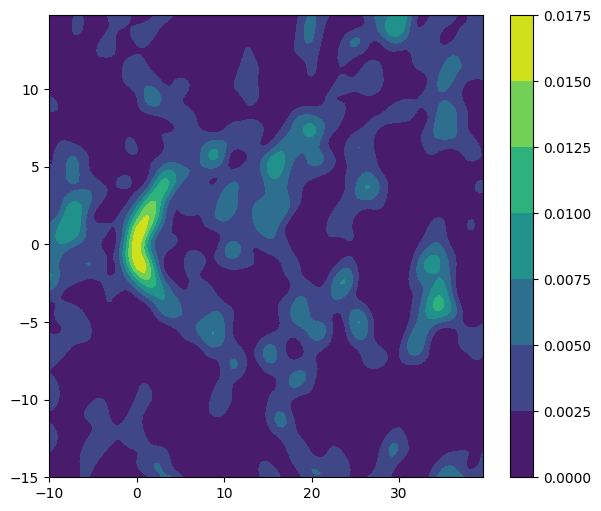

In [ ]:
params = {
   'axes.labelsize': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [7.0, 6.0]
   }
plt.rcParams.update(params)

print("max probability:", predictions_quantum_dmkde_mixed.max())
print("min probability:", predictions_quantum_dmkde_mixed.min())

print("log max probability:", np.log(predictions_quantum_dmkde_mixed.max()))
print("log min probability:", np.log(predictions_quantum_dmkde_mixed.min()))

plt.contourf(x, y, predictions_quantum_dmkde_mixed.reshape([120,120]))
plt.colorbar()
plt.savefig("spiralsdmkde.pdf")

In [ ]:
def evaluate_model(y_true_param, y_pred_param):

  # Kl divergence
  #kl_divergence_temp = tf.keras.metrics.kl_divergence(y_true_param, y_pred_param).numpy()
  kl_divergence_temp = entropy(y_true_param, y_pred_param)

  # Calculate the ranks of the density values
  ranks1 = y_true_param.argsort().argsort()
  ranks2 = y_pred_param.argsort().argsort()

  # Calculate the Spearman correlation
  spearman_corr_temp, _ = spearmanr(ranks1, ranks2)

  # Calculate the absolute differences at each evaluation point
  absolute_differences_temp = np.abs(y_true_param - y_pred_param)

  # Average the absolute differences
  average_error_temp = np.mean(absolute_differences_temp)

  print("KL Divergence:", kl_divergence_temp)
  print("Spearman Correlation:", spearman_corr_temp)
  print("Mean Average Error:", average_error_temp)


In [ ]:
print("                                          ")
print("------ KDE vs DMKDE mixed average --------")
print("                                          ")
evaluate_model(raw_kde_probability, predictions_classical)
print("                                          ")
print("------ KDE vs VQ-KDC QEFF ------------")
print("                                          ")
evaluate_model(raw_kde_probability, predictions_quantum_dmkde_mixed)

                                          
------ KDE vs DMKDE mixed average --------
                                          
KL Divergence: 2.614001995560538
Spearman Correlation: 0.20029738637456945
Mean Average Error: 0.0310361285263212
                                          
------ KDE vs VQ-KDC QEFF ------------
                                          
KL Divergence: 1.8312940828325734
Spearman Correlation: 0.22838820063362367
Mean Average Error: 0.0023208292037253065


# Constants HEA




In [ ]:
GAMMA_DICT = {"Binomial": 2., "Potential 1": 4., "Potential 2": 16., "Arc": 4., "Star": 16.}
GAMMA = GAMMA_DICT["Potential 2"] ## change GAMMA accordingly
DIM_X = X_train.shape[1]
EPOCHS = 15 ## set 15 for the final experiments
N_RFFS = 32 ## set 64 for the final experiments
RANDOM_STATE = 15
NUM_LAYERS_HEA = 3 ## set 3 for the final experiments
NUM_ANCILLA_QUBITS = 2 ## set 2 for the final experiments
NUM_TOTAL_QUBITS = int(np.ceil(np.log2(N_RFFS)) + NUM_ANCILLA_QUBITS)
HEA_ANSATZ_SIZE = int(NUM_TOTAL_QUBITS*(NUM_LAYERS_HEA+1)*2)

print(NUM_TOTAL_QUBITS, HEA_ANSATZ_SIZE)

7 56


# VQ-KDE Mixed with QRFF with HEA


In [ ]:
import matplotlib.pyplot as plt

## VQ-KDE mixed with QRFF with HEA training

In [ ]:
weights_ffs_temp = fm_x.rff_weights.numpy()/np.sqrt(GAMMA) ## weights extracted from classical DMKDE

weights_ffs_temp.mean(), weights_ffs_temp.std()

(-0.06322023, 0.9963657)

In [ ]:
def predict_features(X_param, var_param, gamma_param):
  X_feat = np.ones((len(X_param), var_param.shape[1]), dtype = np.complex128)
  X_feat[:, :] = np.cos(np.sqrt(gamma_param)*(X_param @ var_param)) - 1j*np.sin(np.sqrt(gamma_param)*(X_param @ var_param))
  X_feat *= np.sqrt(1/(var_param.shape[1]))
  return X_feat

X_feat_train = predict_features(X_train, weights_ffs_temp, GAMMA)
X_feat_test = predict_features(X_plot, weights_ffs_temp, GAMMA)
y_expected =  raw_kde_probability_train

X_feat_train.shape, X_feat_test.shape, y_expected.shape

((28000, 32), (14400, 32), (28000,))

In [ ]:
## Convert states to unitaries

U_train_conjTrans = np.array([np.conjugate(create_U_train(X_feat_train[i]).T) for i in range(len(X_feat_train))])
U_test_conjTrans = np.array([np.conjugate(create_U_train(X_feat_test[i]).T) for i in range(len(X_feat_test))])

U_train_conjTrans.shape, U_test_conjTrans.shape

((28000, 32, 32), (14400, 32, 32))

In [ ]:
vc = VQKDE_QRFF_HEA(dim_x_param = DIM_X, var_hea_ansatz_size_param = HEA_ANSATZ_SIZE, num_layers_hea_param = NUM_LAYERS_HEA, gamma=GAMMA, epochs = EPOCHS)

vc.fit(U_train_conjTrans, y_expected, batch_size=16)

Epoch 1/15
1750/1750 [==============================] - 66s 27ms/step - loss: 92.8377 - kullback_leibler_divergence: 0.1814
Epoch 2/15
1750/1750 [==============================] - 46s 26ms/step - loss: 87.4854 - kullback_leibler_divergence: 0.1190
Epoch 3/15
1750/1750 [==============================] - 47s 27ms/step - loss: 86.4089 - kullback_leibler_divergence: 0.1022
Epoch 4/15
1750/1750 [==============================] - 46s 26ms/step - loss: 86.2694 - kullback_leibler_divergence: 0.0998
Epoch 5/15
1750/1750 [==============================] - 50s 29ms/step - loss: 86.1771 - kullback_leibler_divergence: 0.0982
Epoch 6/15
1750/1750 [==============================] - 49s 28ms/step - loss: 86.0526 - kullback_leibler_divergence: 0.0960
Epoch 7/15
1750/1750 [==============================] - 48s 28ms/step - loss: 85.8476 - kullback_leibler_divergence: 0.0929
Epoch 8/15
1750/1750 [==============================] - 49s 28ms/step - loss: 85.5519 - kullback_leibler_divergence: 0.0892
Epoch 9/

In [ ]:
predictions_quantum_dmkde_mixed = vc.predict(U_test_conjTrans)
predictions_quantum_dmkde_mixed

450/450 [==============================] - 23s 25ms/step


array([0.00602642, 0.00740729, 0.00775068, ..., 0.00630156, 0.00626055,
       0.00689509], dtype=float32)

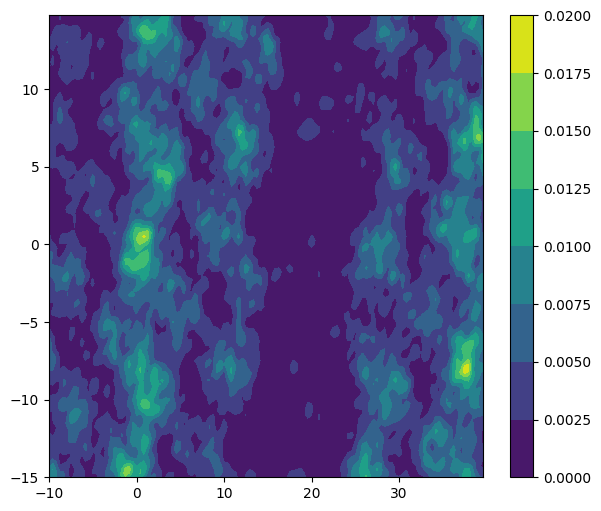

In [ ]:
params = {
   'axes.labelsize': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [7.0, 6.0]
   }
plt.rcParams.update(params)

plt.contourf(x, y, predictions_quantum_dmkde_mixed.reshape([120,120]))
plt.colorbar()
plt.savefig("spiralsdmkde.pdf")

In [ ]:
def evaluate_model(y_true_param, y_pred_param):

  # Kl divergence
  #kl_divergence_temp = tf.keras.metrics.kl_divergence(y_true_param, y_pred_param).numpy()
  kl_divergence_temp = entropy(y_true_param, y_pred_param)

  # Calculate the ranks of the density values
  ranks1 = y_true_param.argsort().argsort()
  ranks2 = y_pred_param.argsort().argsort()

  # Calculate the Spearman correlation
  spearman_corr_temp, _ = spearmanr(ranks1, ranks2)

  # Calculate the absolute differences at each evaluation point
  absolute_differences_temp = np.abs(y_true_param - y_pred_param)

  # Average the absolute differences
  average_error_temp = np.mean(absolute_differences_temp)

  print("KL Divergence:", kl_divergence_temp)
  print("Spearman Correlation:", spearman_corr_temp)
  print("Mean Average Error:", average_error_temp)

In [ ]:
print("                                          ")
print("------ KDE vs DMKDE mixed average --------")
print("                                          ")
evaluate_model(raw_kde_probability, predictions_classical)
print("                                          ")
print("------ KDE vs VQ-KDE QRFF with HEA ------------")
print("                                          ")
evaluate_model(raw_kde_probability, predictions_quantum_dmkde_mixed)
print("                                          ")
print("--DMKDE mixed average vs VQ-KDE QRFF with HEA--")
print("                                          ")
evaluate_model(predictions_classical, predictions_quantum_dmkde_mixed)

                                          
------ KDE vs DMKDE mixed average --------
                                          
KL Divergence: 2.614001995560538
Spearman Correlation: 0.20029738637456945
Mean Average Error: 0.0310361285263212
                                          
------ KDE vs VQ-KDE QRFF with HEA ------------
                                          
KL Divergence: 2.354499290800416
Spearman Correlation: 0.0003574261486822892
Mean Average Error: 0.003494438633035544
                                          
--DMKDE mixed average vs VQ-KDE QRFF with HEA--
                                          
KL Divergence: 0.3119029
Spearman Correlation: 0.441655363433909
Mean Average Error: 0.027668828


# VQ-KDC Mixed with QEFF with HEA

This method uses QEFF, and normalizes the training with the number of epochs.

## VQ-KDC mixed with QEFF training

In [ ]:
y_train_dmkde_classical =  raw_kde_probability_train

In [ ]:
vc = VQKDE_QEFF_HEA(num_ffs_param=N_RFFS, dim_x_param=DIM_X, var_hea_ansatz_size_param = HEA_ANSATZ_SIZE, num_layers_hea_param = NUM_LAYERS_HEA, gamma=GAMMA, epochs = EPOCHS)

vc.fit(X_train, raw_kde_probability_train, batch_size=16)

Epoch 1/15
7
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]
7
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]
1000/1750 [================>.............] - ETA: 14s - loss: 97.2610 - kullback_leibler_divergence: 0.2220

KeyboardInterrupt: 

In [ ]:
predictions_quantum_dmkde_mixed = vc.predict(X_plot)
predictions_quantum_dmkde_mixed

450/450 [==============================] - 49s 19ms/step


array([0.00472846, 0.00575312, 0.00630345, ..., 0.00013345, 0.00023025,
       0.00055913], dtype=float32)

max probability: 0.01761637
min probability: 2.3298687e-06
log max probability: -4.0389266
log min probability: -12.969699


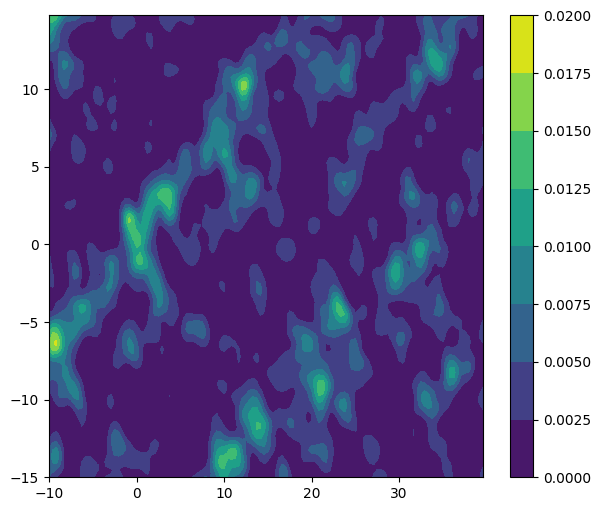

In [ ]:
params = {
   'axes.labelsize': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [7.0, 6.0]
   }
plt.rcParams.update(params)

print("max probability:", predictions_quantum_dmkde_mixed.max())
print("min probability:", predictions_quantum_dmkde_mixed.min())

print("log max probability:", np.log(predictions_quantum_dmkde_mixed.max()))
print("log min probability:", np.log(predictions_quantum_dmkde_mixed.min()))

plt.contourf(x, y, predictions_quantum_dmkde_mixed.reshape([120,120]))
plt.colorbar()
plt.savefig("spiralsdmkde.pdf")

In [ ]:
def evaluate_model(y_true_param, y_pred_param):

  # Kl divergence
  #kl_divergence_temp = tf.keras.metrics.kl_divergence(y_true_param, y_pred_param).numpy()
  kl_divergence_temp = entropy(y_true_param, y_pred_param)

  # Calculate the ranks of the density values
  ranks1 = y_true_param.argsort().argsort()
  ranks2 = y_pred_param.argsort().argsort()

  # Calculate the Spearman correlation
  spearman_corr_temp, _ = spearmanr(ranks1, ranks2)

  # Calculate the absolute differences at each evaluation point
  absolute_differences_temp = np.abs(y_true_param - y_pred_param)

  # Average the absolute differences
  average_error_temp = np.mean(absolute_differences_temp)

  print("KL Divergence:", kl_divergence_temp)
  print("Spearman Correlation:", spearman_corr_temp)
  print("Mean Average Error:", average_error_temp)


In [ ]:
print("                                          ")
print("------ KDE vs DMKDE mixed average --------")
print("                                          ")
evaluate_model(raw_kde_probability, predictions_classical)
print("                                          ")
print("------ KDE vs VQ-KDC QEFF ------------")
print("                                          ")
evaluate_model(raw_kde_probability, predictions_quantum_dmkde_mixed)

                                          
------ KDE vs DMKDE mixed average --------
                                          
KL Divergence: 2.614001995560538
Spearman Correlation: 0.20029738637456945
Mean Average Error: 0.0310361285263212
                                          
------ KDE vs VQ-KDC QEFF ------------
                                          
KL Divergence: 2.1106392888662286
Spearman Correlation: 0.11372831020718387
Mean Average Error: 0.0024355566188194234
